# `image-ops`

Task: perform broadcast and reduction operations on a tensor representing a batch of color images

# Setup

In [1]:
from fastai.vision.all import *

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
# But "Grays" is inverted, so we use "gray" instead.
matplotlib.rc('image', cmap='gray')

Download dataset.

In [2]:
path = untar_data(URLs.PETS) / "images"

Make a stable order for the images: first sort, then randomize using a known seed.

In [3]:
set_seed(333)
image_files = get_image_files(path).sorted().shuffle()

Define how we're going to split the data into a training and validation set.

In [4]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

In this dataset, cat breeds start with a capital letter, so we can get the label from the filename.

In [5]:
def cat_or_dog(x):
    return 'cat' if x[0].isupper() else 'dog'

def get_y(file_path):
    return cat_or_dog(file_path.name)

Define a standard image-classification `DataBlock`.

In [6]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

Override `shuffle_fn` so that the images never actually get shuffled (batch order is consistent).

In [7]:
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

Since we set the `shuffle_fn` to the identity above, the images will always get loaded in the same order, so the first batch will always be the same:

In [8]:
batch = dataloaders.train.one_batch()
images_orig, labels = batch
images = images_orig.clone()

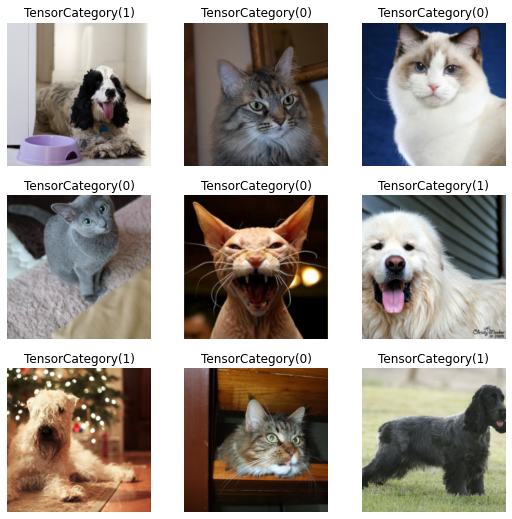

In [9]:
show_image_batch((images, labels))

# Task

1. **Evaluate `images.shape`**. What does each number represent?

In [10]:
images.shape

torch.Size([9, 3, 224, 224])

The first value is batch size. The second value is the number of colour channels. The third is height and the fourth is width. 

2. **Evaluate `labels`**. Explain those numbers, with the help of `dataloaders.train.vocab`.

In [11]:
labels

TensorCategory([1, 0, 0, 0, 0, 1, 1, 0, 1], device='cuda:0')

In [12]:
dataloaders.train.vocab

['cat', 'dog']

0 is the label for 'cat'
1 is the label for 'dog'

3. **Show the first image in the batch.** (Use `show_image`.)

<AxesSubplot:>

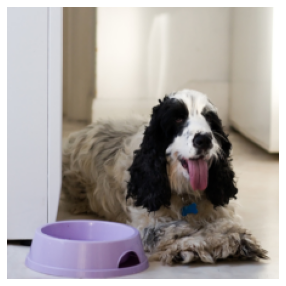

In [13]:
show_image(images[0])

4. **Show the average image.** Hint: you can compute this by taking the `.mean(axis=___)`; think about what the blank is.

<AxesSubplot:>

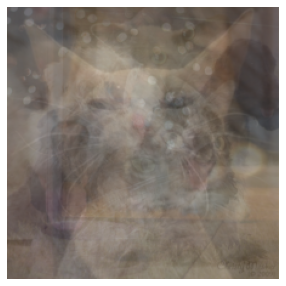

In [17]:
show_image(images.mean(axis=0))

**Part B: Show the average of the middle 3 images.**

You'll need to use *slicing* to compute this.

<AxesSubplot:>

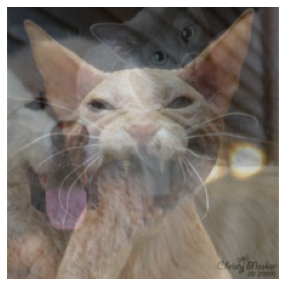

In [21]:
show_image(images[3:6].mean(axis=0))

5. **Show the grayscale version of all of the images.**

- *Do this by making minimal changes to the previous exercise; do not import anything new.*
- For simplicity, just use an equal weighting of the red, green, and blue channels.
- You can use `show_images` to show all of the images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


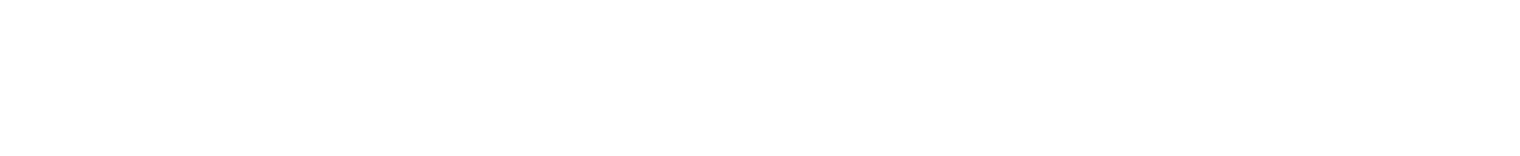

In [25]:
# your code here
show_images(255 - images)

6. **Invert the color of the images** (e.g., black becomes white). Show the result.

In [ ]:
# your code here

The next exercise will require you to assign to slices. It wil also require you to "skip" dimensions in slicing. To prepare, study what this does:

In [ ]:
images.shape

In [ ]:
images[:, 0].shape

In [ ]:
images[:, :, 0, 0] = 0.0
print(images[0, 0, 0, 0], images[5, 1, 0, 0], images[0, 0, 5, 1])
# restore the original images
images = images_orig.clone()

7. **Black out (set to 0) the top 75 pixels of each image, then grey out (set to 0.5) the right 50 pixels of each image.**

In [ ]:
# your code here

In [ ]:
# restore the original images for the next step
images = images_orig.clone()

8. **Show only the red color channel** by zeroing out the green and blue channels.

In [ ]:
# your code here

## Analysis

1. What does each number in `images.shape` represent?

*your answer here*

2. Explain the numbers in `labels`.

*your answer here*